In [ ]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt

In [ ]:
df = web.DataReader("BTC-USD" , data_source='yahoo' , start='2012-01-01' , end='2020-11-5')

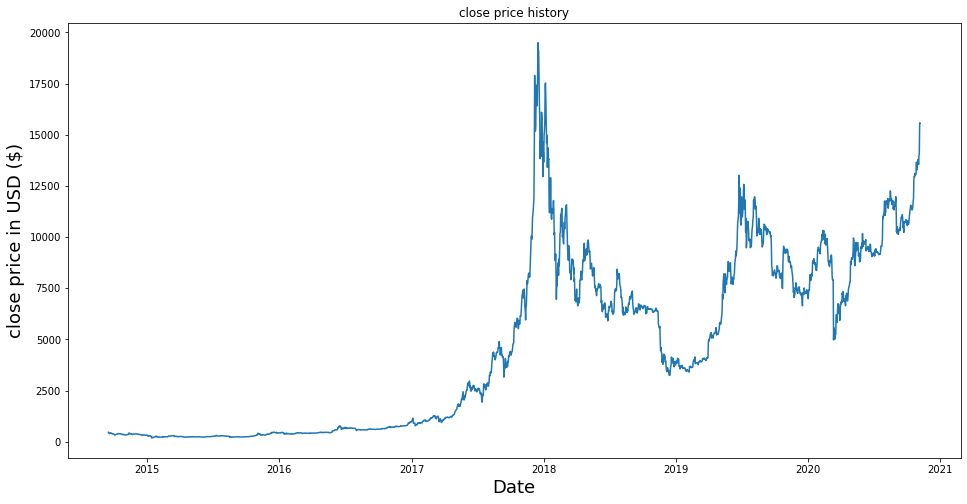

In [ ]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price in USD ($)' , fontsize=18)
plt.show()


In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01445348],
       [0.01275083],
       [0.0112164 ],
       ...,
       [0.72236602],
       [0.7972208 ],
       [0.7964978 ]])

In [ ]:
train_data = scaled_data[0:training_data_len , :]

In [ ]:
x_train = []
y_train = []
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01445348, 0.01275083, 0.0112164 , 0.01194666, 0.01142474,
       0.01159716, 0.01333837, 0.0126869 , 0.01208486, 0.01171481,
       0.01146092, 0.01030462, 0.0102159 , 0.01080997, 0.01063765,
       0.01019545, 0.00939004, 0.00780375, 0.00737123, 0.00786654,
       0.0081827 , 0.00904986, 0.00967546, 0.00949615, 0.0095343 ,
       0.01037543, 0.01098958, 0.0115308 , 0.01121521, 0.01058284,
       0.01064506, 0.01104279, 0.01094465, 0.0105978 , 0.01078569,
       0.010614  , 0.00933336, 0.00932964, 0.00875643, 0.00914117,
       0.0090524 , 0.00929201, 0.00815185, 0.00865466, 0.00829316,
       0.00764241, 0.00764981, 0.00773584, 0.00788792, 0.00835346,
       0.00886093, 0.00850507, 0.00866414, 0.00958425, 0.0097737 ,
       0.00981361, 0.01270533, 0.01255905, 0.01137283, 0.01025037])]
[0.010858520753790677]



In [ ]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape[1]

60

In [ ]:
#dynamic
model = Sequential()
model.add(LSTM(x_train.shape[1],input_shape=(x_train.shape[1:])))
model.add(Dense(y_train.shape[0], activation='tanh'))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train,y_train , batch_size=128,epochs=100)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60)                14880     
_________________________________________________________________
dense_13 (Dense)             (None, 1735)              105835    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 1736      
Total params: 122,451
Trainable params: 122,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
14/14 [==============================] - 1s 55ms/step - loss: 0.0139
Epoch 2/100
14/14 [==============================] - 1s 53ms/step - loss: 0.0016
Epoch 3/100
14/14 [==============================] - 1s 52ms/step - loss: 6.9314e-04
Epoch 4/100
14/14 [==============================] - 1s 53ms/step - loss: 5.2832e-04
Epoch 5/100
14/14 [===========================

In [ ]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

96.82591683523995

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]

In [ ]:
valid['predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


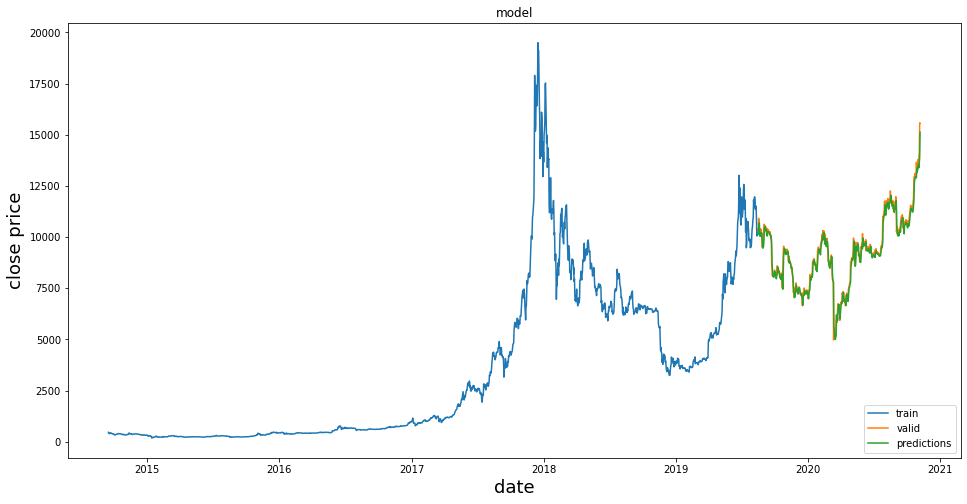

In [ ]:

plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','valid','predictions'],loc='lower right')

In [ ]:
valid

,Close,predictions
Date,,
2019-08-16,10231.744141,10199.221680
2019-08-17,10345.810547,10122.676758
2019-08-18,10916.053711,10201.755859
2019-08-19,10763.232422,10680.412109
2019-08-20,10138.049805,10678.692383
...,...,...
2020-11-02,13550.489258,13549.402344
2020-11-03,13950.300781,13389.057617
2020-11-04,14133.707031,13677.700195


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train , batch_size=128,epochs=100)
model.summary()

Epoch 1/100
14/14 [==============================] - 1s 90ms/step - loss: 0.0218
Epoch 2/100
14/14 [==============================] - 1s 91ms/step - loss: 0.0033
Epoch 3/100
14/14 [==============================] - 1s 91ms/step - loss: 0.0015
Epoch 4/100
14/14 [==============================] - 1s 88ms/step - loss: 0.0012
Epoch 5/100
14/14 [==============================] - 1s 88ms/step - loss: 0.0012
Epoch 6/100
14/14 [==============================] - 1s 87ms/step - loss: 0.0011
Epoch 7/100
14/14 [==============================] - 1s 91ms/step - loss: 0.0010
Epoch 8/100
14/14 [==============================] - 1s 86ms/step - loss: 9.9495e-04
Epoch 9/100
14/14 [==============================] - 1s 86ms/step - loss: 9.8072e-04
Epoch 10/100
14/14 [==============================] - 1s 87ms/step - loss: 9.1259e-04
Epoch 11/100
14/14 [==============================] - 1s 91ms/step - loss: 8.7856e-04
Epoch 12/100
14/14 [==============================] - 1s 87ms/step - loss: 8.5383e-04
Epoch

In [ ]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

train = data[:training_data_len]
valid = data[training_data_len:]

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

61.87922559465681

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


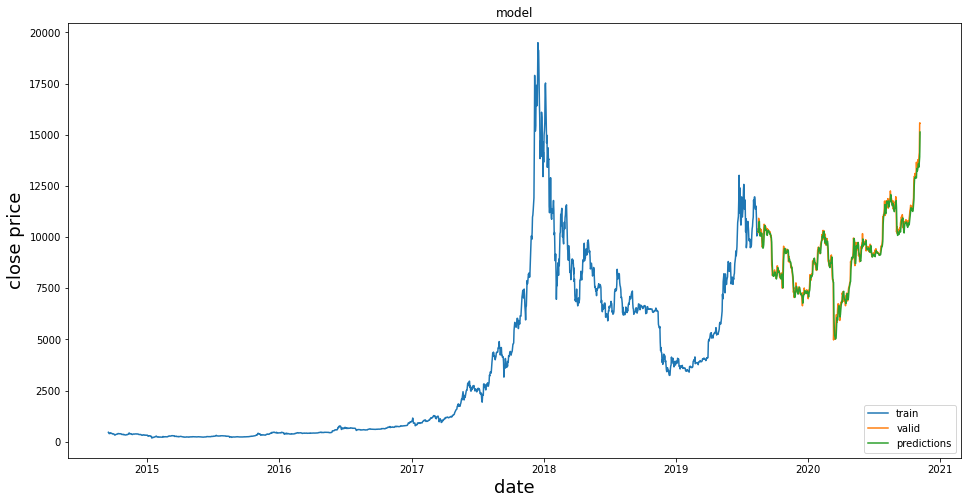

In [ ]:
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','valid','predictions'],loc='lower right')

In [ ]:
valid

,Close,predictions
Date,,
2019-08-16,10231.744141,10269.941406
2019-08-17,10345.810547,10237.413086
2019-08-18,10916.053711,10289.927734
2019-08-19,10763.232422,10706.466797
2019-08-20,10138.049805,10764.236328
...,...,...
2020-11-02,13550.489258,13590.054688
2020-11-03,13950.300781,13416.142578
2020-11-04,14133.707031,13675.285156


In [ ]:
model = Sequential()
model.add(LSTM(5,input_shape=(x_train.shape[1:])))
model.add(Dense(y_train.shape[0], activation='tanh'))
model.add(Dense(1))
model.summary()
# compile the model
#optimizer = RMSprop(0.1)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train,y_train , batch_size=1,epochs=100)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 5)                 140       
_________________________________________________________________
dense_37 (Dense)             (None, 1735)              10410     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 1736      
Total params: 12,286
Trainable params: 12,286
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1735/1735 [==============================] - 14s 8ms/step - loss: 0.0016
Epoch 2/100
1735/1735 [==============================] - 14s 8ms/step - loss: 8.3906e-04
Epoch 3/100
1735/1735 [==============================] - 14s 8ms/step - loss: 7.4825e-04
Epoch 4/100
1735/1735 [==============================] - 14s 8ms/step - loss: 7.0925e-04
Epoch 5/100
1735/1735 [====

In [ ]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

train = data[:training_data_len]
valid = data[training_data_len:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


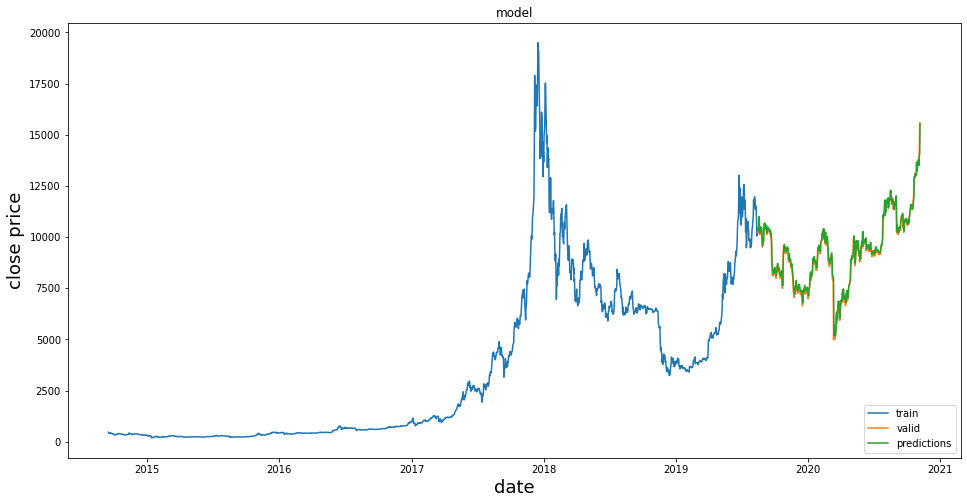

In [ ]:
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','valid','predictions'],loc='lower right')


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

82.22726767403739

In [ ]:
valid

,Close,predictions
Date,,
2019-08-16,10231.744141,10453.686523
2019-08-17,10345.810547,10306.242188
2019-08-18,10916.053711,10429.063477
2019-08-19,10763.232422,10999.870117
2019-08-20,10138.049805,10811.879883
...,...,...
2020-11-02,13550.489258,13679.107422
2020-11-03,13950.300781,13499.185547
2020-11-04,14133.707031,13922.110352


In [ ]:
model = Sequential()
model.add(LSTM(10,return_sequences=True, input_shape=(x_train.shape[1:])))
model.add(LSTM(5))
model.add(Dense(y_train.shape[0], activation='tanh'))
model.add(Dense(25))
model.add(Dense(1))
model.summary()
# compile the model
#optimizer = RMSprop(lr=learn_rate)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train,y_train , batch_size=128,epochs=100)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 60, 10)            480       
_________________________________________________________________
lstm_27 (LSTM)               (None, 5)                 320       
_________________________________________________________________
dense_39 (Dense)             (None, 1735)              10410     
_________________________________________________________________
dense_40 (Dense)             (None, 25)                43400     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 26        
Total params: 54,636
Trainable params: 54,636
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
14/14 [==============================] - 1s 40ms/step - loss: 0.0203
Epoch 2/100
14/14 [===============

In [ ]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

train = data[:training_data_len]
valid = data[training_data_len:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


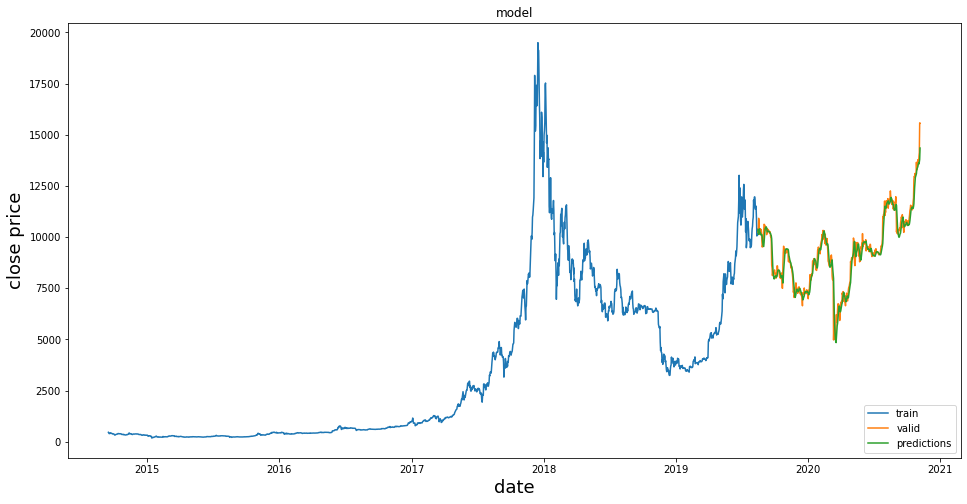

In [ ]:
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','valid','predictions'],loc='lower right')


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

58.34758431570871

In [ ]:
valid

,Close,predictions
Date,,
2019-08-16,10231.744141,10344.509766
2019-08-17,10345.810547,10183.225586
2019-08-18,10916.053711,10119.559570
2019-08-19,10763.232422,10275.453125
2019-08-20,10138.049805,10401.414062
...,...,...
2020-11-02,13550.489258,13612.875977
2020-11-03,13950.300781,13586.211914
2020-11-04,14133.707031,13667.640625
